In [43]:
import pandas as pd
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

## Load data

### Data 1

In [16]:
def load_data(folder_path):
    # Danh sách để lưu thông tin ảnh
    image_data = []
    
    # Duyệt qua các tệp trong thư mục
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            # Đường dẫn đầy đủ đến tệp ảnh
            img_path = os.path.join(folder_path, filename)
            img_path = img_path.replace("\\", "/")
            # Mở ảnh
            img = Image.open(img_path)
            # Lấy kích thước ảnh
            width, height = img.size
            # Thêm thông tin ảnh vào danh sách
            image_data.append({'filename': filename, 'path': img_path, 'width': width, 'height': height})
    
    # Tạo DataFrame từ danh sách
    df = pd.DataFrame(image_data)
    return df

In [17]:
def check_path(path):
    '''
    
    :param path: 
    :return: Boolean
    '''
    return os.path.exists(path)
        

In [18]:
path='data/data_1/'

df_1=pd.DataFrame()

for i in range(26):
    new_path=path+str(i)
    if check_path(new_path):
        temp_df=load_data(new_path)
        df_1=pd.concat([df_1,temp_df])
        
df_1.shape

(21900, 4)

### Data 2

In [22]:
path_2='data/data_2/'

df_2=pd.DataFrame()

for i in range(56):
    new_path=path_2+str(i)
    if check_path(new_path):
        temp_df=load_data(new_path)
        df_2=pd.concat([df_2,temp_df])
        
df_2.shape

(1666, 4)

In [ ]:
df_1.head()

In [20]:
df_2.head()

,filename,path,width,height
0,00000_00000_00000.png,data/data_1/0/00000_00000_00000.png,29,30
1,00000_00000_00001.png,data/data_1/0/00000_00000_00001.png,30,30
2,00000_00000_00002.png,data/data_1/0/00000_00000_00002.png,30,30
3,00000_00000_00003.png,data/data_1/0/00000_00000_00003.png,31,31
4,00000_00000_00004.png,data/data_1/0/00000_00000_00004.png,30,32


### Data 3

## Visualize data

### Data 1

In [27]:
df_1['isSquare'] = (df_1['width'] == df_1['height']).astype(int)

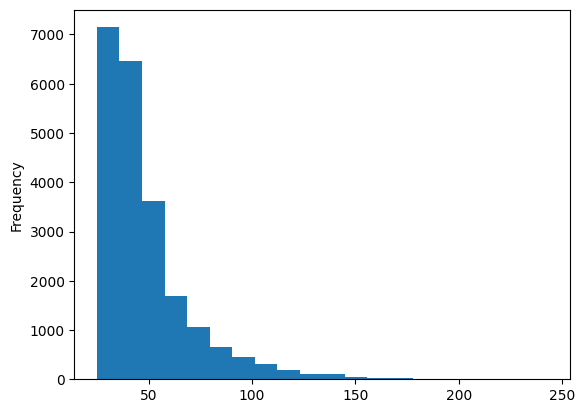

In [25]:
#pie chart for data 1
df_1['width'].plot(kind='hist',bins=20)
plt.show()

<Axes: ylabel='Frequency'>

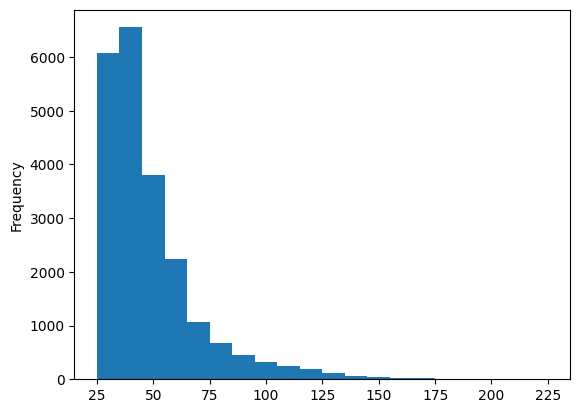

In [26]:
df_1['height'].plot(kind='hist',bins=20)

<Axes: ylabel='count'>

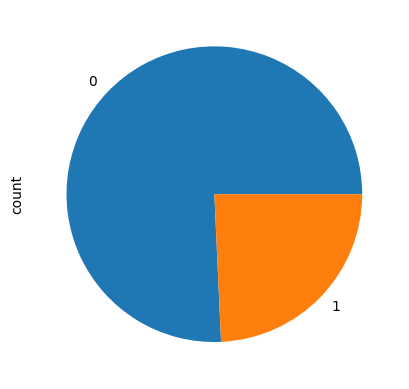

In [28]:
#pie chart for data 1
df_1['isSquare'].value_counts().plot(kind='pie')

### Data 2

In [29]:
df_2['isSquare'] = (df_2['width'] == df_2['height']).astype(int)

<Axes: ylabel='Frequency'>

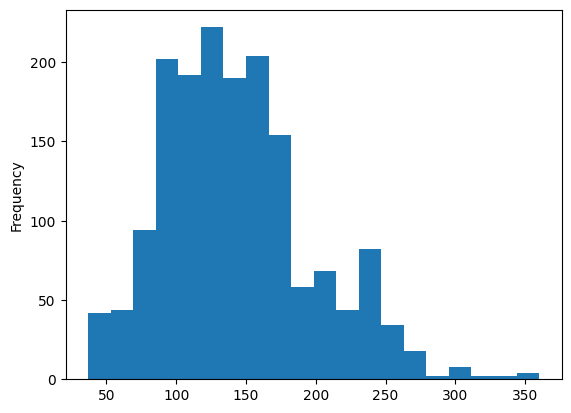

In [30]:
#pie chart for data 2
df_2['width'].plot(kind='hist',bins=20)

<Axes: ylabel='Frequency'>

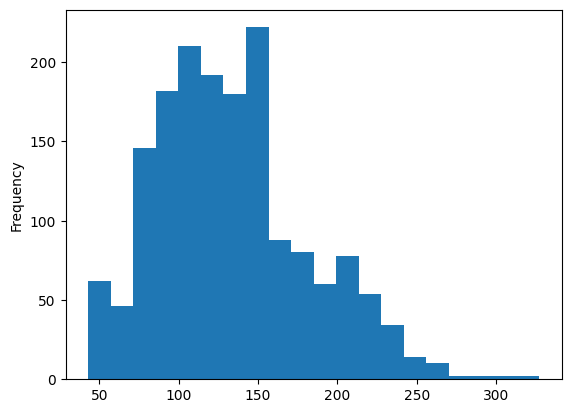

In [31]:
df_2['height'].plot(kind='hist',bins=20)

<Axes: ylabel='count'>

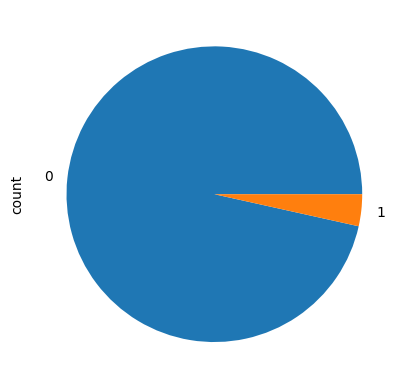

In [32]:
#pie chart for data 2
df_2['isSquare'].value_counts().plot(kind='pie')

## Processing data

In [102]:
# after_processing_path = 'after/'
# 
# def add_padding(image_path):
#     # Mở ảnh
#     img = Image.open(image_path)
#     
#     # Lấy kích thước của ảnh
#     width, height = img.size
#     
#     # Tìm cạnh dài hơn
#     max_side = max(width, height)
#     
#     # Tính toán padding cần thêm
#     padding = (
#         (max_side - width) // 2,  # Padding trái
#         (max_side - height) // 2, # Padding trên
#         (max_side - width + 1) // 2,  # Padding phải
#         (max_side - height + 1) // 2  # Padding dưới
#     )
#     
#     # Thêm padding vào ảnh
#     padded_img = ImageOps.expand(img, padding, fill='black')
#     
#     # Tạo đường dẫn mới
#     
#     new_path = after_processing_path + image_path.replace('data/', '')
#     
#     # Lưu ảnh đã thêm padding vào đường dẫn mới
#     try:
#         padded_img.save(new_path)
#     except FileNotFoundError:
#         os.makedirs(os.path.dirname(new_path))
#         padded_img.save(new_path)
#         
#     
#     return new_path

In [103]:
# # for index, row in df_1.iterrows():
# #     new_path=add_padding(row['path'])
# #     df_1['new_path']=add_padding(new_path)
# #     
# df_1.head()

,filename,path,width,height,isSquare,new_path
0,00000_00000_00000.png,data/data_1/0/00000_00000_00000.png,29,30,0,after/after/data_1/25/00025_00049_00029.png
1,00000_00000_00001.png,data/data_1/0/00000_00000_00001.png,30,30,1,after/after/data_1/25/00025_00049_00029.png
2,00000_00000_00002.png,data/data_1/0/00000_00000_00002.png,30,30,1,after/after/data_1/25/00025_00049_00029.png
3,00000_00000_00003.png,data/data_1/0/00000_00000_00003.png,31,31,1,after/after/data_1/25/00025_00049_00029.png
4,00000_00000_00004.png,data/data_1/0/00000_00000_00004.png,30,32,0,after/after/data_1/25/00025_00049_00029.png


In [104]:
# for index, row in df_2.iterrows():
#     new_path=add_padding(row['path'])
#     df_2['new_path']=add_padding(new_path)
#     
# df_2.head()

,filename,path,width,height,isSquare,new_path
0,002_0001.png,data/data_2/2/002_0001.png,79,82,0,after/after/data_2/55/055_1_0080.png
1,002_0002.png,data/data_2/2/002_0002.png,86,83,0,after/after/data_2/55/055_1_0080.png
2,002_0003.png,data/data_2/2/002_0003.png,182,165,0,after/after/data_2/55/055_1_0080.png
3,002_0004.png,data/data_2/2/002_0004.png,255,210,0,after/after/data_2/55/055_1_0080.png
4,002_0005.png,data/data_2/2/002_0005.png,170,161,0,after/after/data_2/55/055_1_0080.png
